<a href="https://colab.research.google.com/github/aaryaP777/Convolutional-Neural-Networks/blob/main/CNN_2_Linear_Regression_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import re

In [4]:
# !wget used to directly get data from github

# !wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv

url = "https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv"

In [5]:
# read data and convert into numpy array

try:
  response = requests.get(url)
  response.raise_for_status()

  data = pd.read_csv(io.StringIO(response.text), header=None, sep='\t').to_numpy()

  print(data[:5])

except requests.exceptions.RequestException as e:
    print(f"Error downloading the data: {e}")
except Exception as e:
    print(f"An error occurred during data processing: {e}")

[['Intel 4004' '2,300' '1971' 'Intel' '10,000 nm' '12 mm²']
 ['Intel 8008' '3,500' '1972' 'Intel' '10,000 nm' '14 mm²']
 ['Intel 8080' '4,500' '1974' 'Intel' '6,000 nm' '20 mm²']
 ['Motorola 6800' '4,100' '1974' 'Motorola' '6,000 nm' '16 mm²']
 ['RCA 1802' '5,000' '1974' 'RCA' '5,000 nm' '27 mm²']]


In [8]:
X = data[:, 0].astype(str)
# X = np.array([float(''.join(re.findall(r'\d+', x))) for x in X]).reshape(-1, 1) # making N x D matrix

X_cleaned = []
for x in X:
    digits = re.findall(r'\d+', x)
    cleaned_x = ''.join(digits)
    if cleaned_x: # Check if the cleaned string is not empty
        X_cleaned.append(float(cleaned_x))
    else:
        X_cleaned.append(np.nan) # Append NaN if no digits were found

X = np.array(X_cleaned).reshape(-1, 1) # making N x D matrix

Y = data[:, 1].astype(str)
Y = np.array([float(''.join(re.findall(r'\d+', y))) for y in Y])

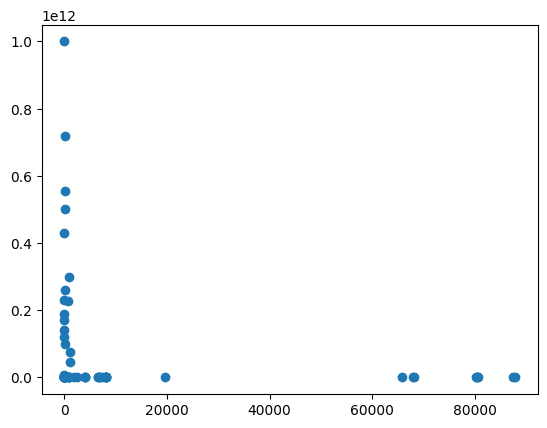

In [9]:
plt.scatter(X, Y)
plt.show()

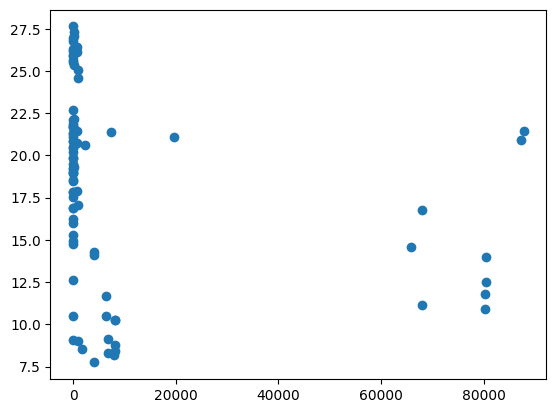

In [10]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [11]:
X = X - X.mean()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [14]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [16]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: nan - learning_rate: 0.0010
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: nan - learning_rate: 0.0010
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan - learning_rate: 0.0010
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: nan

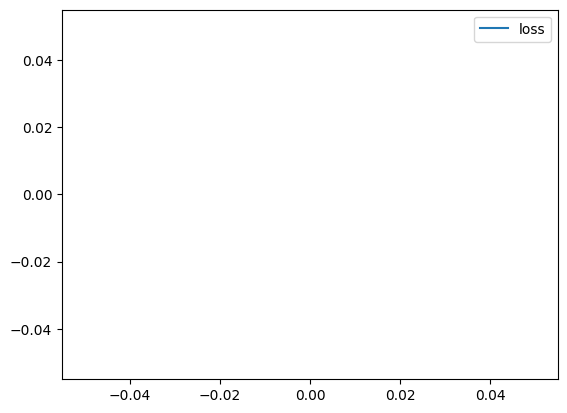

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [18]:
model.layers

[<Dense name=dense, built=True>]

In [19]:
model.layers[0].get_weights()

[array([[nan]], dtype=float32), array([nan], dtype=float32)]